In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

# cora

In [2]:
cora_edges = pd.read_csv("data/cora/cora.cites", sep="\t", names=["source", "target"])
cora_edges.head(2)

,source,target
0,35,1033
1,35,103482


In [3]:
names = ["node"] + [f"word{i}" for i in range(1433)] + ["label"]
cora_context = pd.read_csv("data/cora/cora.content", sep="\t", names=names)
cora_context.head(2)

,node,word0,word1,word2,word3,word4,word5,word6,word7,word8,...,word1424,word1425,word1426,word1427,word1428,word1429,word1430,word1431,word1432,label
0,31336,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Neural_Networks
1,1061127,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Rule_Learning


## グラフデータの情報

In [4]:
G = nx.Graph()
G.add_edges_from(cora_edges.values)

In [5]:
# 基本的な情報
print("ノード数:", G.number_of_nodes())
print("エッジ数:", G.number_of_edges())

ノード数: 2708
エッジ数: 5278


平均次数: 3.8980797636632203


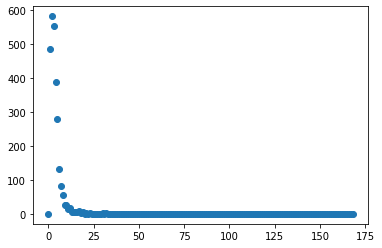

In [6]:
# 次数周りの確認

print("平均次数:", np.average([degree for node, degree in G.degree]))

dh = nx.degree_histogram(G)
plt.scatter(x=np.arange(len(dh)), y=dh)

In [7]:
# その他の情報
print("components数:", nx.number_connected_components(G))
print("クラスタ係数:", nx.average_clustering(G))

components数: 78
クラスタ係数: 0.2406732985019372


## ラベルデータの情報

In [9]:
# ラベルの分布
cora_context.groupby("label").size().sort_values(ascending=False)

label
Neural_Networks           818
Probabilistic_Methods     426
Genetic_Algorithms        418
Theory                    351
Case_Based                298
Reinforcement_Learning    217
Rule_Learning             180
dtype: int64

In [14]:
cora_context.drop(["node", "label"], axis="columns").mean().sort_values(ascending=False)[:30]

word1177    0.399926
word1263    0.361891
word507     0.249631
word1209    0.215657
word19      0.206795
word1075    0.173191
word1381    0.156573
word774     0.148449
word1328    0.135894
word132     0.105982
word1352    0.103028
word1131    0.096381
word1301    0.096012
word495     0.093427
word1071    0.093427
word1230    0.093058
word619     0.092688
word540     0.086411
word729     0.086411
word1132    0.084195
word1198    0.080133
word1262    0.077548
word763     0.076809
word1389    0.075702
word1332    0.074594
word99      0.072378
word1170    0.072009
word969     0.072009
word1118    0.070532
word1249    0.070162
dtype: float64

In [15]:
cora_context.drop(["node", "label"], axis="columns").mean().describe()

count    1433.000000
mean        0.012683
std         0.023831
min         0.000000
25%         0.002954
50%         0.005539
75%         0.013294
max         0.399926
dtype: float64

In [16]:
cora_context.drop(["node", "label"], axis="columns").sum(axis=1).sort_values(ascending=False)[:30]

838     30
1393    28
2609    28
1128    27
1724    27
1959    27
242     27
1057    27
886     27
383     27
534     27
1995    26
1326    26
704     26
966     26
35      26
1605    26
1213    26
2404    26
2220    26
170     26
1507    26
173     26
2100    26
1340    26
2657    26
1275    26
1826    26
1438    26
1294    26
dtype: int64

In [17]:
cora_context.drop(["node", "label"], axis="columns").sum(axis=1).describe()

count    2708.000000
mean       18.174298
std         5.758010
min         1.000000
25%        17.000000
50%        20.000000
75%        22.000000
max        30.000000
dtype: float64